In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import time

In [2]:
# Leggo i file e li assegno alla variabile data e la ridimensiono come richiesto
X_ising=np.loadtxt('ising_conf.dat')
X_ising=X_ising.reshape(25000,28*28)
temp = np.loadtxt('ising_label.dat')            # Leggo il file della temperatura e lo assegno a temp

X_mnist, Y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")
Y_mnist = Y_mnist.astype(int)

In [3]:
ordinato = (temp < 2.0)                    #crea un numpy array in cui assegna true alla componente i se temp[i]<2.0, false altrimenti
critico = ((temp >= 2.0) & (temp <= 2.5))  #crea un numpy array in cui assegna true alla componente i se temp[i]>=2.0 & <=2.5, false altrimenti
disordinato = (temp > 2.5)                 #crea un numpy array in cui assegna true alla componente i se temp[i]>2.5, false altrimenti

labels_ising = np.zeros(shape=temp.shape)        # Creo un numpy array con shape uguale a temp

# Ora creo il mio array di labels con valori 0,1,2 in base agli array ordinato, critico e disordinato creati prima, quindi per esempio, a labels[ordinato]=0, assegna 0 a tutte le componenti true dell'array ordinato, assegnando però il valore all'array labels, uguale per le altre 2 istruzioni.
labels_ising[ordinato]=0
labels_ising[critico]=1
labels_ising[disordinato]=2

# Parte 1

Analisi PCA: campione Ising2D

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn:

`from sklearn.decomposition import PCA`

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA

3.   graficare lo scatter plot delle prime due componenti principali in due plot distinti: uno in cui ogni configurazione viene colorata in accordo al valore della temeperatura, e un secondo in cui ogni configurazione viene colorata in accordo ad una delle tre clasi *(0,1,2)* corrispondenti alle configurazioni ordinate, critiche e disordinate, rispettivamente.

4.   graficare lo scatter plot della prima componente principale in funzione della magnetizzazione media calcolata nell'esercitazione precedente. Cosa se ne deduce?

In [4]:
pca = PCA(n_components=10)                 # Istanzio la mia PCA a 10 componenti principali
X_pca = pca.fit_transform(X_ising)         # Riduco i miei dati (features) a 10 componenti 
exp_var = pca.explained_variance_ratio_    # Calcolo la varianza spiegata della mia pca per vedere di quanto contribuiscono sulle informazioni le mie 10 componenti principali

# Le stampo
for i in range(10):
    print("Varianza spiegata per la componente principale numero:", i+1 , "con valore =", exp_var[i])
    
print("varianza spiegata totale delle prime dieci componenti = ", np.sum(exp_var))

Varianza spiegata per la componente principale numero: 1 con valore = 0.36692223272715513
Varianza spiegata per la componente principale numero: 2 con valore = 0.020684599425628194
Varianza spiegata per la componente principale numero: 3 con valore = 0.019794912324753246
Varianza spiegata per la componente principale numero: 4 con valore = 0.019665792216259418
Varianza spiegata per la componente principale numero: 5 con valore = 0.019201865249658227
Varianza spiegata per la componente principale numero: 6 con valore = 0.0051484717377283246
Varianza spiegata per la componente principale numero: 7 con valore = 0.005000251213529549
Varianza spiegata per la componente principale numero: 8 con valore = 0.0049447358477206485
Varianza spiegata per la componente principale numero: 9 con valore = 0.004900024927242439
Varianza spiegata per la componente principale numero: 10 con valore = 0.004781422681867588
varianza spiegata totale delle prime dieci componenti =  0.47104430835154276


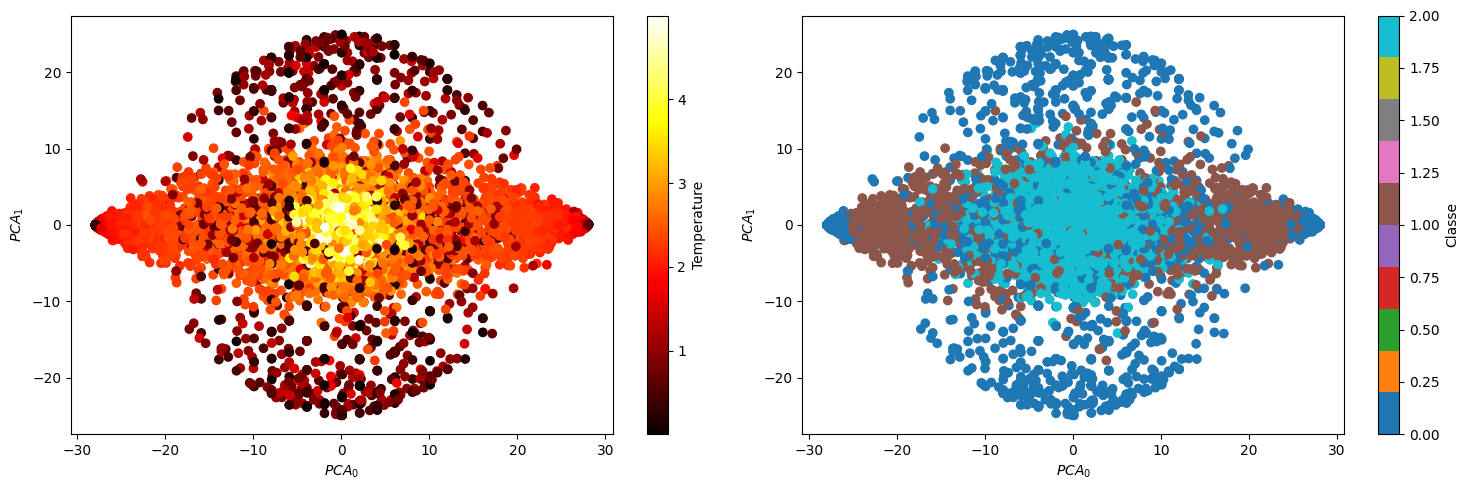

In [5]:
# Eseguo degli scatter plot della prima componente principale vs. la seconda
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=temp, cmap='hot')
cbar = plt.colorbar()
cbar.set_label('Temperature')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_ising, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')
plt.tight_layout()

# Parte 2

Analisi PCA: campione MNIST

0.   normalizzare le immagini in [0,1] e graficare le prime 16 immagini mnist

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn sul campione MNIST

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA

3.   graficare lo scatter plot delle prime due componenti principali in cui ogni configurazione viene colorata in accordo al valore della label di classe Y_mnist (0,1,2,3,...,9)

4.   applicare la trasformzione inversa PCA per tornare nello spazio originale alle prime 10 componenti principali, e graficare le prime 16 immagini mnist confrontandole con le immagini originali ... cosa è cambiato? Perché?
Riprovare usando 2 componenti principali, cosa cambia? Quante componenti sono necessarie per avere una ricostruzione in cui i caratteri siano percepibili?

In [6]:
X_mnist = X_mnist/255                           # Normalizzazione dei dati tra 0 e 1 essendo che i dati vanno da 0 a 255

pca2 = PCA(n_components=10)                     # Istanzio la mia nova PCA a 10 componenti

X_mnist_pca = pca2.fit_transform(X_mnist)       # Riduco i miei dati del dataset MNIST
mnist_exp_var = pca2.explained_variance_ratio_  # Calcolo la varianza spiegata

for i in range(10):
    print("Varianza spiegata per la componente principale numero:", i+1, "con valore =", mnist_exp_var[i])

print("varianza spiegata totale delle prime dieci componenti = ", np.sum(mnist_exp_var))

Varianza spiegata per la componente principale numero: 1 con valore = 0.0974611592249466
Varianza spiegata per la componente principale numero: 2 con valore = 0.07155444586868787
Varianza spiegata per la componente principale numero: 3 con valore = 0.06149530980586288
Varianza spiegata per la componente principale numero: 4 con valore = 0.05403384527948809
Varianza spiegata per la componente principale numero: 5 con valore = 0.048889337021585766
Varianza spiegata per la componente principale numero: 6 con valore = 0.043052270268972105
Varianza spiegata per la componente principale numero: 7 con valore = 0.03278261328049861
Varianza spiegata per la componente principale numero: 8 con valore = 0.028896401157089427
Varianza spiegata per la componente principale numero: 9 con valore = 0.02758353367673563
Varianza spiegata per la componente principale numero: 10 con valore = 0.023420889593634964
varianza spiegata totale delle prime dieci componenti =  0.4891698051775019


Text(0, 0.5, '$PCA2_1$')

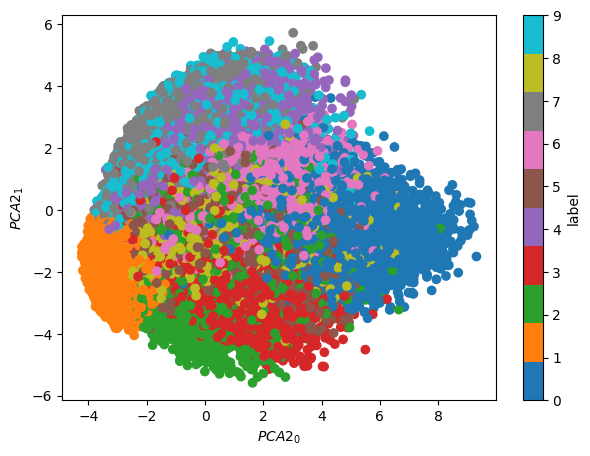

In [7]:
# Scatter plot della prima componente principale vs. la seconda
plt.figure(figsize=(7,5))
plt.scatter(X_mnist_pca[:,0], X_mnist_pca[:,1], c=Y_mnist, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('label')
plt.xlabel('$PCA2_0$')
plt.ylabel('$PCA2_1$')

<Figure size 640x480 with 0 Axes>

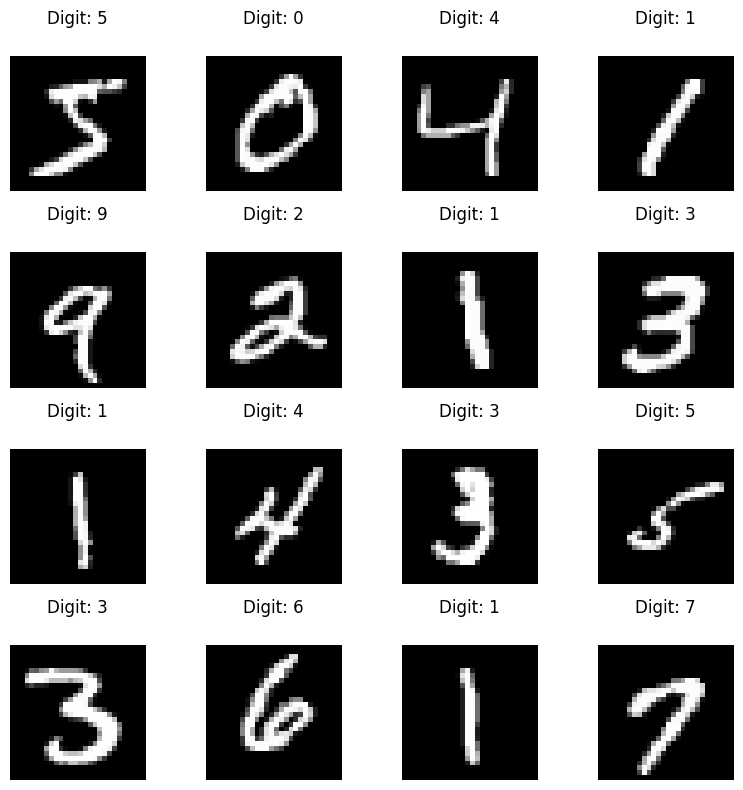

In [8]:
plt.gray()
fig = plt.figure( figsize=(8,8) )

# Stampo le prime 16 immagini del dataset MNIST
for i in range(0,16):
    ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))
    ax.matshow(X_mnist[i].reshape(28,28).astype(float))
    plt.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

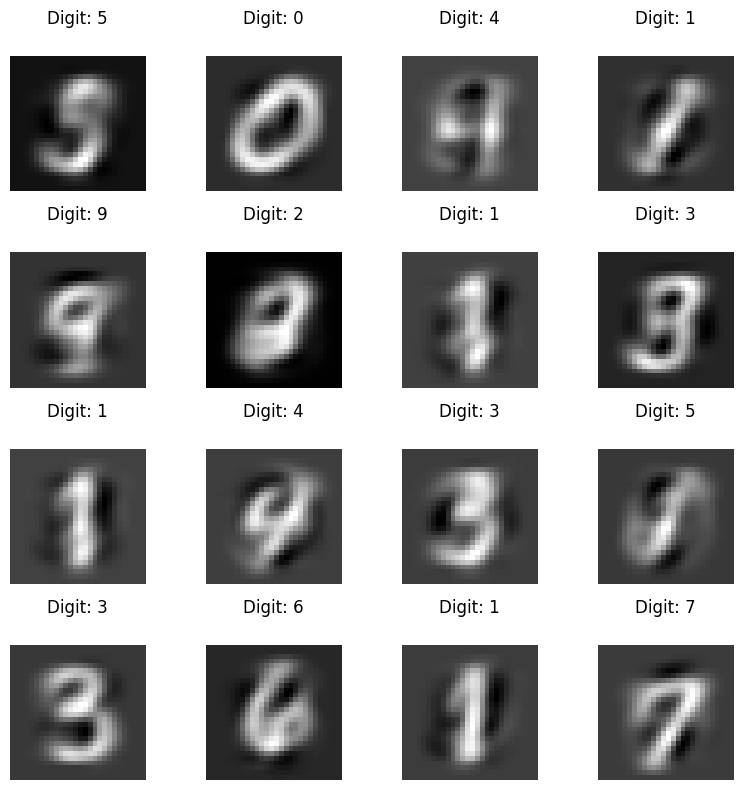

In [9]:
# applichiamo la trasformazione inversa solo alle prime 16 immagini
X_transf_mnist = pca2.inverse_transform(X_mnist_pca[:16])

# plottiamo le immagini
plt.gray()
fig = plt.figure(figsize=(8,8))

for i in range(0,16):
    ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))
    ax.matshow(X_transf_mnist[i].reshape(28,28).astype(float))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Parte 3

Ripetere la parte 2 (punti 1,2,3) usando tSNE come algoritmo di rappresentazione di manifold multidimensionali (usare n_components del TSNE=2):

`from sklearn.manifold import TSNE`

NOTA: tSNE può essere molto lento se il numero di feature x numero di eventi è grande, in tal caso è possibile applicare prima una PCA che riduca le dimensioni a <=50 e poi applicare tSNE alle variabili PCA

Usare solo i primi 5000 eventi del campione MNIST e applicare tSNE, per diversi valori della perplexity: 5, 20 e 40 e confrontare i plot nello spazio tSNE0 vs tSNE1.

Usare tutti i dati ma dare in input a tSNE la pca a 50 componenti calcolata prima. Conforntare il plot con quelli precedenti.

In [24]:
# Inizializziamo la tSNE per i 3 diversi valori della perplexity
tsne1 = TSNE(n_components=2, verbose=1, random_state=42, perplexity=5, n_iter=300)
tsne2 = TSNE(n_components=2, verbose=1, random_state=42, perplexity=20, n_iter=300)
tsne3 = TSNE(n_components=2, verbose=1, random_state=42, perplexity=40, n_iter=300)

### Per i primi 5000 valori utilizzando solo la tSNE

In [25]:
time_start = time.time()
# Riduco il dataset a 2 componenti solo per i primi 5000 valori
X_tsne1 = tsne1.fit_transform(X_mnist[:5000])
X_tsne2 = tsne2.fit_transform(X_mnist[:5000])
X_tsne3 = tsne3.fit_transform(X_mnist[:5000])
print('Time elapsed: {} secondi'.format(time.time()-time_start))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.018s...
[t-SNE] Computed neighbors for 5000 samples in 0.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.480345
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.101273
[t-SNE] KL divergence after 300 iterations: 3.492732
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.016s...
[t-SNE] Computed neighbors for 5000 samples in 0.323s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional p

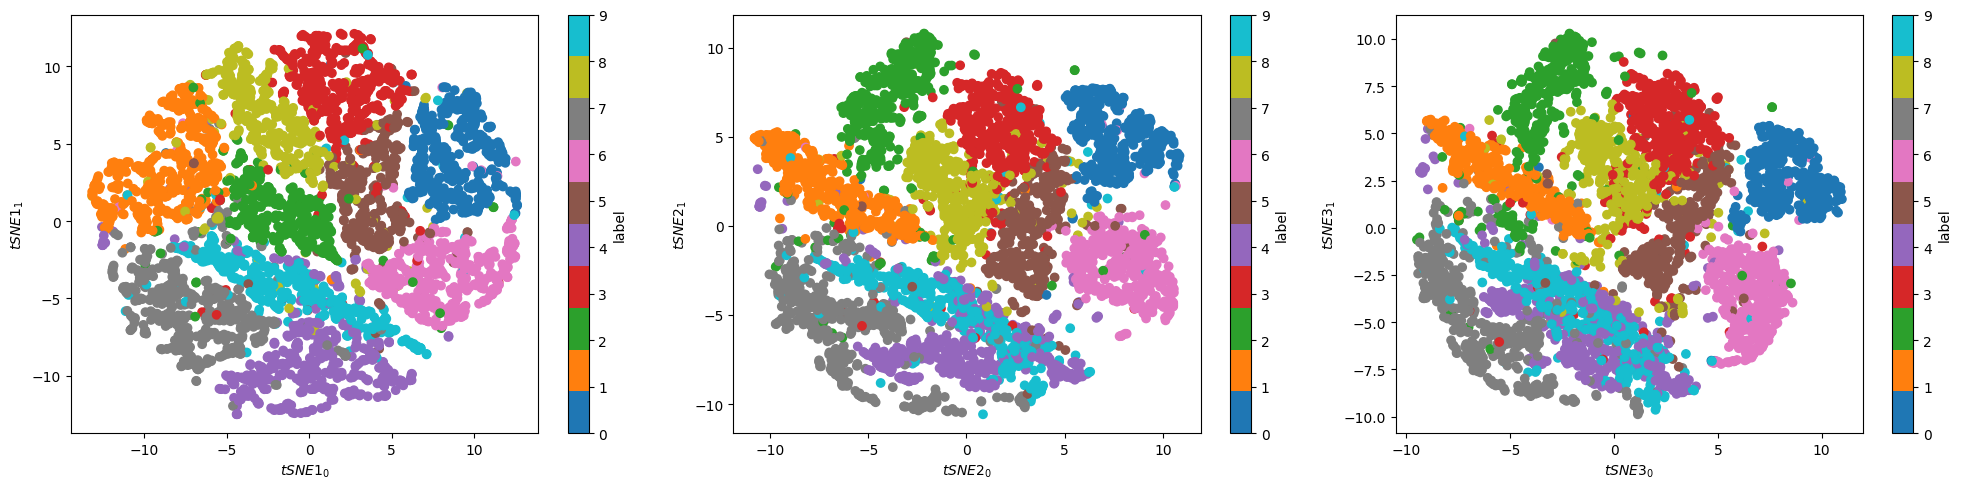

In [26]:
# Faccio gli scatter plot della prima componente vs. la seconda per tutte e tre le tSNE istanziate
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=Y_mnist[:5000], cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('label')
plt.xlabel('$tSNE1_0$')
plt.ylabel('$tSNE1_1$')
plt.subplot(1,3,2)
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=Y_mnist[:5000], cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('label')
plt.xlabel('$tSNE2_0$')
plt.ylabel('$tSNE2_1$')
plt.subplot(1,3,3)
plt.scatter(X_tsne3[:, 0], X_tsne3[:, 1], c=Y_mnist[:5000], cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('label')
plt.xlabel('$tSNE3_0$')
plt.ylabel('$tSNE3_1$')

plt.tight_layout()

### Utilizzando tutti i valori di MNIST ma dopo averlo ridotto a 50 valori principali tramite la PCA

In [29]:
pca3 = PCA(n_components=50)                   # Inizializzo la PCA a 50 componenti
X_mnist_pca = pca3.fit_transform(X_mnist)     # Riduco le features a 50 valori principali

# Istanzio 3 nuove tSNE che verranno applicate sui dati già ridotti dalla PCA
tsne4 = TSNE(n_components=2, verbose=1, random_state=42, perplexity=5, n_iter=300)
tsne5 = TSNE(n_components=2, verbose=1, random_state=42, perplexity=20, n_iter=300)
tsne6 = TSNE(n_components=2, verbose=1, random_state=42, perplexity=40, n_iter=300)

In [30]:
time_start2 = time.time()
# Riduco le features a 2 componenti sta volta di tutte le osservazioni, però a partire dalle features già ridotte a 50 componenti principali dalla PCA
X_tsne4 = tsne4.fit_transform(X_mnist_pca)
X_tsne5 = tsne5.fit_transform(X_mnist_pca)
X_tsne6 = tsne6.fit_transform(X_mnist_pca)
print('Time elapsed: {} secondi'.format(time.time()-time_start2))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.012s...
[t-SNE] Computed neighbors for 70000 samples in 5.559s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for sam

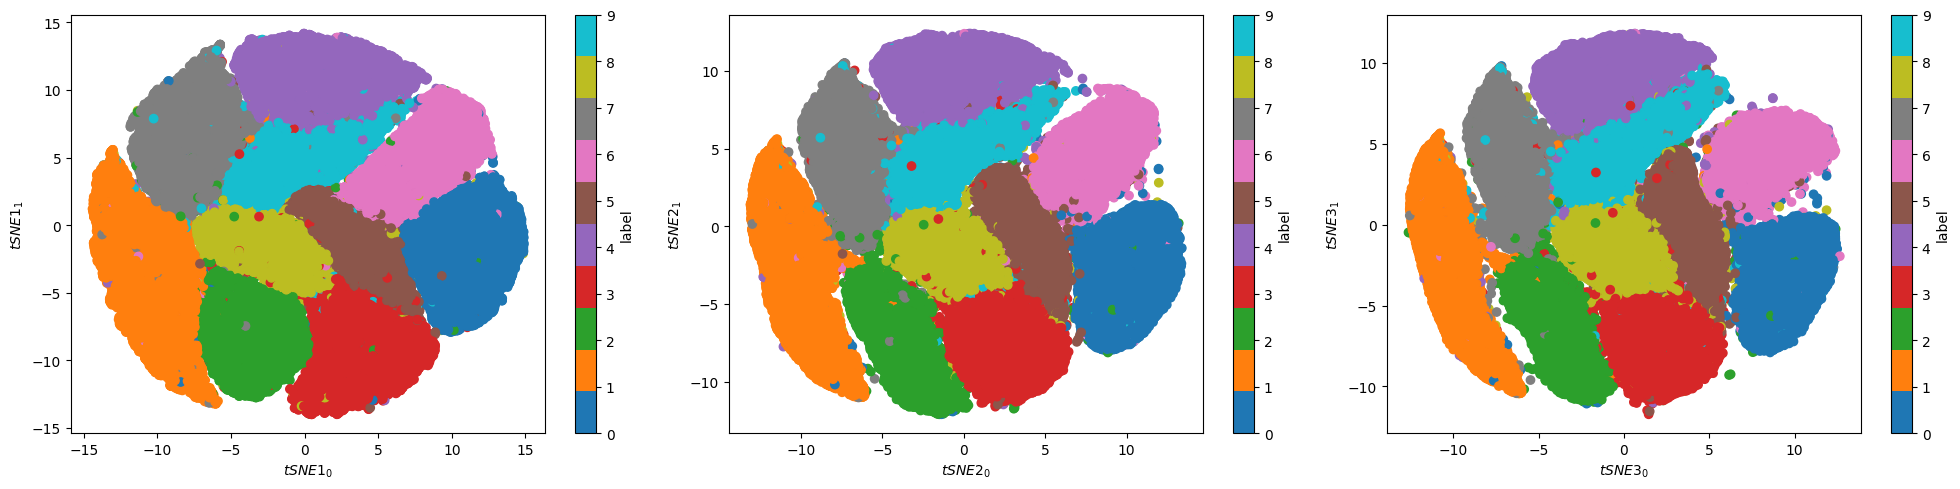

In [36]:
# Stessi scatter plot
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(X_tsne4[:, 0], X_tsne4[:, 1], c=Y_mnist, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('label')
plt.xlabel('$tSNE1_0$')
plt.ylabel('$tSNE1_1$')
plt.subplot(1,3,2)
plt.scatter(X_tsne5[:, 0], X_tsne5[:, 1], c=Y_mnist, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('label')
plt.xlabel('$tSNE2_0$')
plt.ylabel('$tSNE2_1$')
plt.subplot(1,3,3)
plt.scatter(X_tsne6[:, 0], X_tsne6[:, 1], c=Y_mnist, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('label')
plt.xlabel('$tSNE3_0$')
plt.ylabel('$tSNE3_1$')

plt.tight_layout()

# Parte 4

Ripetere la parte 2 (punti 1,2,3) usando UMAP come algoritmo di rappresentazione di manifold multidimensionali, applicarlo solo sui primi 5000 eventi MNIST e usare come input i dati mnist trasformati con PCA con 10 componenti.

Comandi utili:
```

manifold = umap.UMAP().fit(X, Y)
manifold_reduced = manifold.transform(X)

#e poi plottare manifold_reduced[:,0] vs [:,1] come fatto per PCA e tSNE

```

In [41]:
manifold = umap.UMAP().fit(X_mnist_pca[:5000], Y_mnist[:5000])   # Istanzio il mio modello UMAP e lo alleno sui miei primi 5000 dati
X_mnist_umap = manifold.transform(X_mnist_pca[:5000])            # Abbasso dunque la dimensionalità dei miei dati a 2 a partire dai dati del MNIST già ridotti dalla PCA

Text(0, 0.5, '$UMAP_1$')

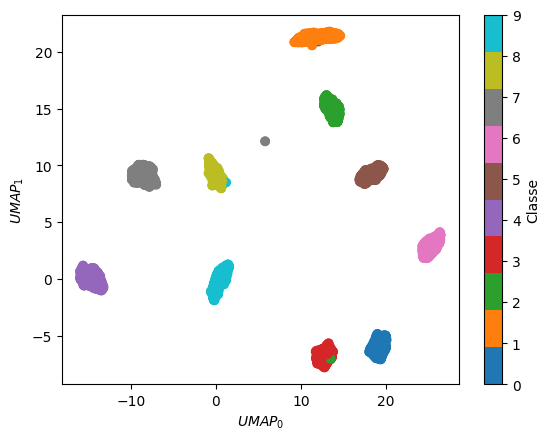

In [43]:
# Faccio lo scatter plot della prima componente vs. la seconda
plt.scatter(X_mnist_umap[:,0], X_mnist_umap[:,1], c=Y_mnist[:5000], cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$UMAP_0$')
plt.ylabel('$UMAP_1$')